In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("atlanta_cleaned_data.csv")

In [2]:
cols_to_drop_for_model = [
    'ID', 'Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
    'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Weather_Condition',
    'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
    'Wind_Direction', 'YearMonth','End_Lat', 'End_Lng', 'Distance(mi)','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

existing_cols_to_drop = [col for col in cols_to_drop_for_model if col in df.columns]

df_model = df.drop(columns=existing_cols_to_drop)

X = df_model.drop('Severity', axis=1)
y = df_model['Severity']
print(f"Modele verilecek nihai özellikler: {list(X.columns)}")

# --- Kategorik Verileri Dönüştürme ---
X = pd.get_dummies(X, drop_first=True)
print(f"Yeni özellik sayısı: {X.shape[1]}")


# --- Veriyi Eğitim ve Test Setlerine Ayırma ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nVeri {len(X_train)} eğitim, {len(X_test)} test ")



Modele verilecek nihai özellikler: ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Hour', 'Month', 'Day', 'Rush_Hour', 'Weather_Group']
Yeni özellik sayısı: 34

Veri 50841 eğitim, 12711 test 


# Base Models

## Base RandomForest


--- Temel Model Performans Değerlendirmesi ---

1. Modelin Doğruluğu (Accuracy): 0.7094
2. Kesinlik (Precision): 0.7201
3. Duyarlılık (Recall): 0.7362
4. F1 Skoru: 0.7281

2. Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Ciddi Değil (0)       0.70      0.68      0.69      5994
      Ciddi (1)       0.72      0.74      0.73      6717

       accuracy                           0.71     12711
      macro avg       0.71      0.71      0.71     12711
   weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


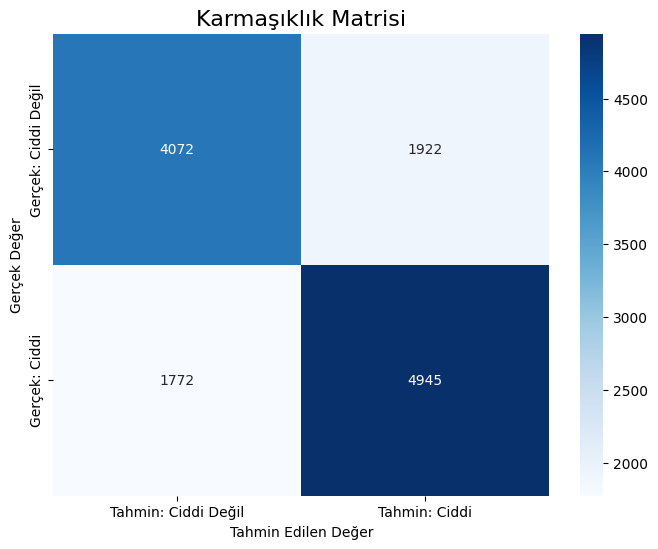

In [3]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# --- Modeli Kurma ve Eğitme ---
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

# --- Performansı Değerlendirme ---
print("\n--- Temel Model Performans Değerlendirmesi ---")
y_pred = rf_baseline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n1. Modelin Doğruluğu (Accuracy): {accuracy:.4f}")
print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"4. F1 Skoru: {f1_score(y_test, y_pred):.4f}")


print("\n2. Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=['Ciddi Değil (0)', 'Ciddi (1)']))

print("\n3. Karmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
            yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi', fontsize=16)
plt.show()



--- Model Kararlarında En Etkili Olan Özellikler ---


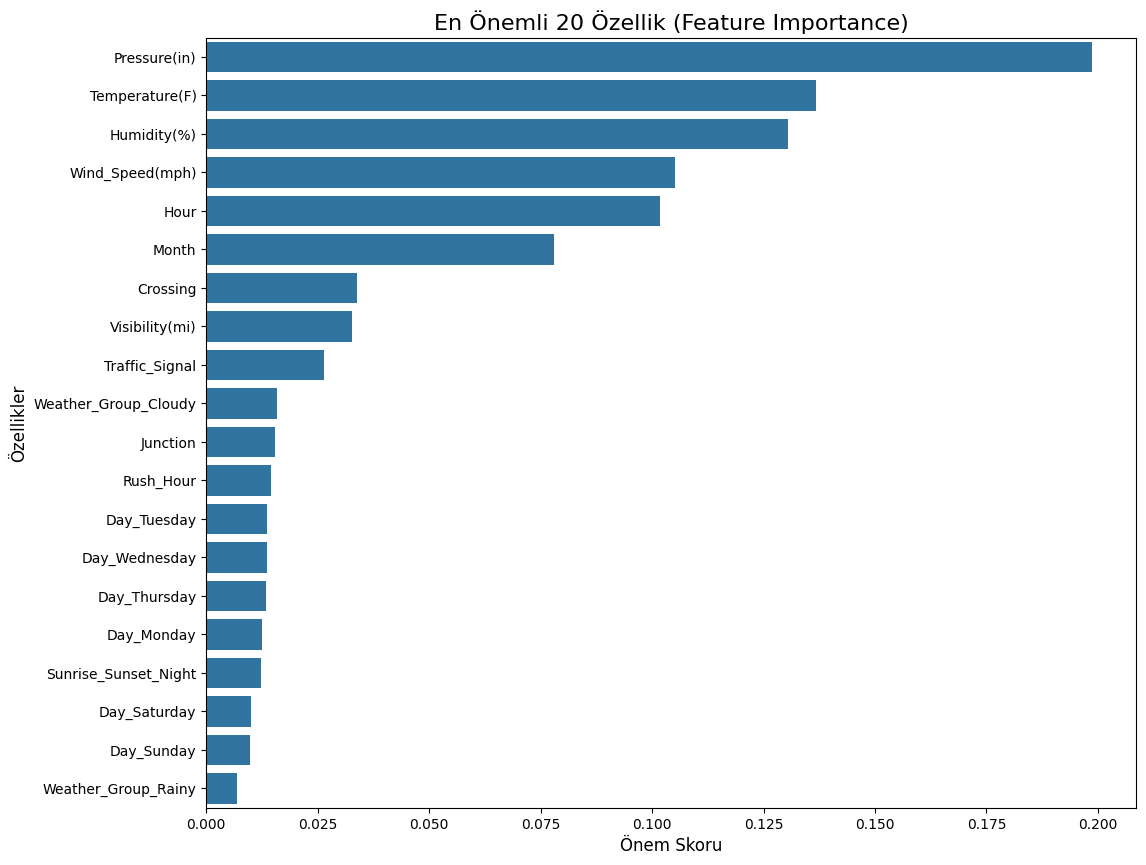

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# --- ÖZELLİK ÖNEM DÜZEYLERİNİ GÖRSELLEŞTİRME ---
print("\n--- Model Kararlarında En Etkili Olan Özellikler ---")

feature_importances = pd.Series(rf_baseline.feature_importances_, index=X_train.columns)

# En önemli 20 özellik
top_20_features = feature_importances.nlargest(20)

# Görselleştirme
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_features, y=top_20_features.index)
plt.title('En Önemli 20 Özellik (Feature Importance)', fontsize=16)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.show()

## Base XGBoost

d:\Datalarım\Desktop\Severity-Analysis-and-Prediction-of-Traffic-Accidents-in-Atlanta\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:45:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Model Performans Değerlendirmesi ---

1. XGBoost Modelinin Doğruluğu (Accuracy): 0.7048
2. Kesinlik (Precision): 0.7084
3. Duyarlılık (Recall): 0.7502
4. F1 Skoru: 0.7287

2. Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Ciddi Değil (0)       0.70      0.65      0.68      5994
      Ciddi (1)       0.71      0.75      0.73      6717

       accuracy                           0.70     12711
      macro avg       0.70      0.70      0.70     12711
   weighted avg       0.70      0.70      0.70     12711


3. Karmaşıklık Matrisi:


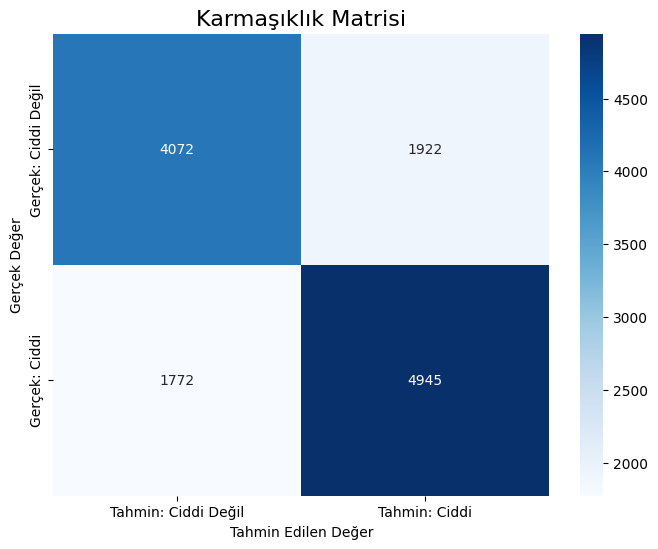

In [5]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
    
xgb_model.fit(X_train, y_train)

# --- Performansı Değerlendirme ---
print("\n--- XGBoost Model Performans Değerlendirmesi ---")
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"\n1. XGBoost Modelinin Doğruluğu (Accuracy): {accuracy_xgb:.4f}")
print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred_xgb):.4f}")
print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred_xgb):.4f}")
print(f"4. F1 Skoru: {f1_score(y_test, y_pred_xgb):.4f}")

print("\n2. Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_xgb, target_names=['Ciddi Değil (0)', 'Ciddi (1)']))


print("\n3. Karmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
            yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi', fontsize=16)
plt.show()

d:\Datalarım\Desktop\Severity-Analysis-and-Prediction-of-Traffic-Accidents-in-Atlanta\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



SHAP analizi başlıyor...
SHAP değerlerini hesaplamak için 2000 satırlık bir örneklem kullanılıyor...
SHAP değerleri hesaplandı.

SHAP özet grafikleri oluşturuluyor...


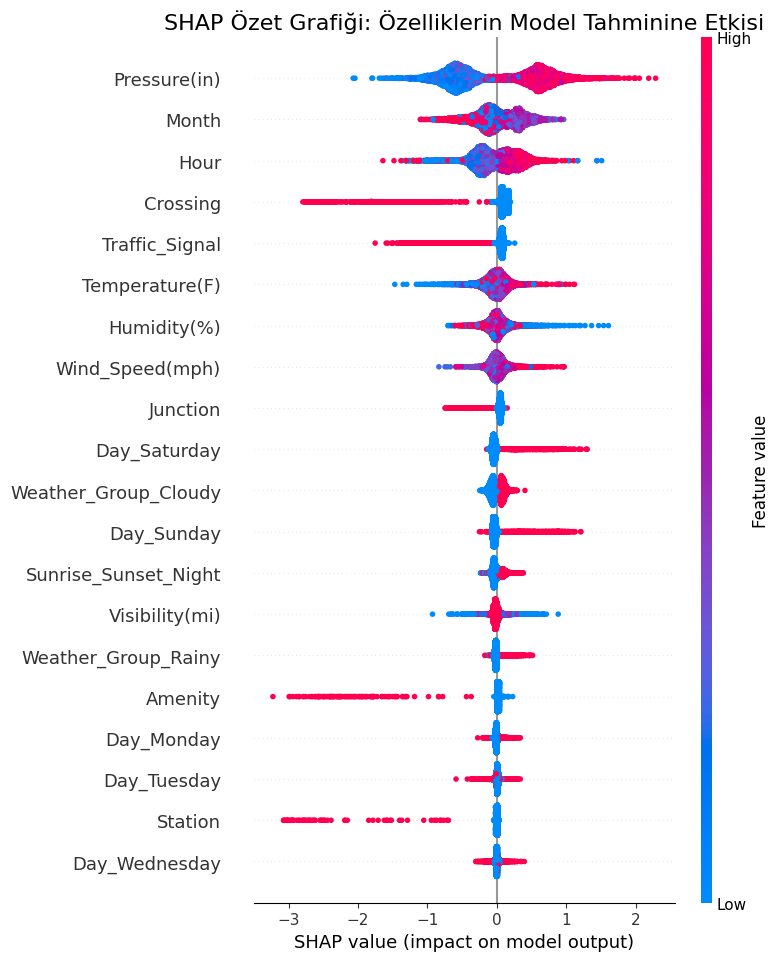

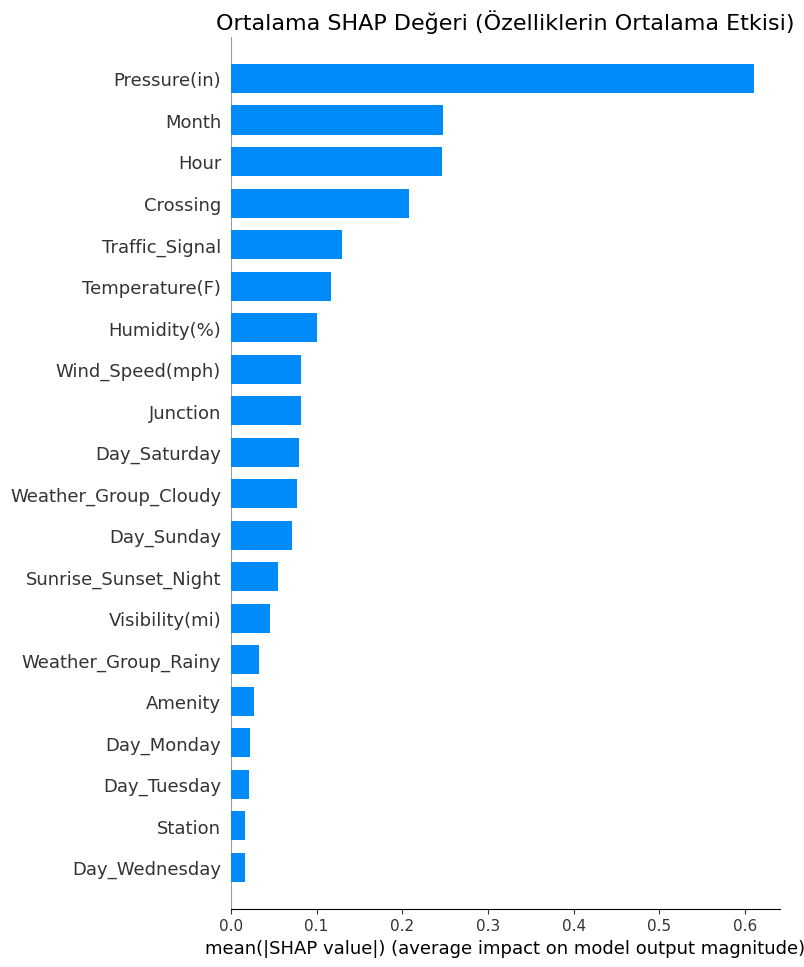

In [6]:
# --- HIZLANDIRILMIŞ SHAP ANALİZİ ---
import shap

print("\nSHAP analizi başlıyor...")
explainer = shap.TreeExplainer(xgb_model)
print("SHAP değerlerini hesaplamak için 2000 satırlık bir örneklem kullanılıyor...")
X_test_sample = X_test
shap_values = explainer.shap_values(X_test_sample)
print("SHAP değerleri hesaplandı.")

# --- SHAP Görselleştirmeleri ---
print("\nSHAP özet grafikleri oluşturuluyor...")

# 1. SHAP Özet Grafiği (Beeswarm Plot)
shap.summary_plot(shap_values, X_test_sample, plot_type="dot", show=False)
plt.title("SHAP Özet Grafiği: Özelliklerin Model Tahminine Etkisi", fontsize=16)
plt.show()

# 2. Bar Grafiği - Ortalama Etki
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title("Ortalama SHAP Değeri (Özelliklerin Ortalama Etkisi)", fontsize=16)
plt.show()

# Zaman Analizi

In [7]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Start_Lat'] = pd.to_numeric(df['Start_Lat'], errors='coerce')
df['Start_Lng'] = pd.to_numeric(df['Start_Lng'], errors='coerce')
df.dropna(subset=['Start_Lat', 'Start_Lng', 'Start_Time'], inplace=True)

# --- Veriyi Sıralama ---
df.sort_values(by='Start_Time', inplace=True)
df.reset_index(drop=True, inplace=True)

# --- Gerekli Verileri NumPy Dizilerine Çevirme ---
coords = df[['Start_Lat', 'Start_Lng']].values
times = df['Start_Time'].values
distances_mi = df['Distance(mi)'].values
MILE_TO_KM = 1.60934

In [8]:
from geopy.distance import great_circle 
from tqdm import tqdm


# --- "Dinamik Geriye Dönük Tarama" ile Özellik Hesaplama ---
time_window = pd.Timedelta(hours=1) 
is_secondary_list = [0] * len(df) 

for i in tqdm(range(1, len(df))):
    current_time = times[i]
    current_coord = coords[i]

    # Zamanda geriye doğru tarama
    for j in range(i - 1, -1, -1):
        time_diff = current_time - times[j]
        
        if time_diff > time_window:
            break

        dist_km =  great_circle(current_coord, coords[j]).km

        
        if dist_km <= (distances_mi[j] * MILE_TO_KM):
            is_secondary_list[i] = 1
            break 

df['Is_Secondary_Accident'] = is_secondary_list

100%|██████████| 63551/63551 [00:04<00:00, 14804.87it/s]


In [9]:
secondary_accident_count = df['Is_Secondary_Accident'].sum()
secondary_accident_ratio = df['Is_Secondary_Accident'].mean() * 100

print("\n--- Analiz Sonuçları ---")
print(f"Toplam {len(df)} kazanın {secondary_accident_count} tanesi 'İkincil Kaza' olarak etiketlendi.")
print(f"Bu, tüm kazaların yaklaşık %{secondary_accident_ratio:.2f}'sine denk geliyor.")

domino_file_path = 'Atlanta_Accidents_With_Domino_Effect.csv'
df.to_csv(domino_file_path, index=False)
print(f"\nSon özellikli veri seti '{domino_file_path}' dosyasına başarıyla kaydedildi.")


--- Analiz Sonuçları ---
Toplam 63552 kazanın 9003 tanesi 'İkincil Kaza' olarak etiketlendi.
Bu, tüm kazaların yaklaşık %14.17'sine denk geliyor.

Son özellikli veri seti 'Atlanta_Accidents_With_Domino_Effect.csv' dosyasına başarıyla kaydedildi.


Modele verilecek nihai özellikler: ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Hour', 'Month', 'Day', 'Rush_Hour', 'Weather_Group', 'Is_Secondary_Accident']
Yeni özellik sayısı: 35

Veri 50841 eğitim, 12711 test 

--- Temel Model Performans Değerlendirmesi ---

1. Modelin Doğruluğu (Accuracy): 0.7097
2. Kesinlik (Precision): 0.7162
3. Duyarlılık (Recall): 0.7463
4. F1 Skoru: 0.7310

2. Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Ciddi Değil (0)       0.70      0.67      0.68      5994
      Ciddi (1)       0.72      0.75      0.73      6717

       accuracy                           0.71     12711
      macro avg       0.71      0.71      0.71     12711
   weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Mat

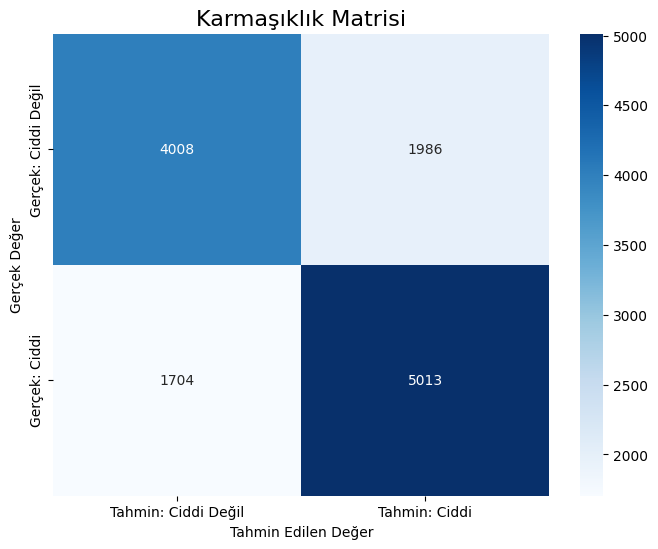

In [10]:
cols_to_drop_for_model = [
    'ID', 'Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
    'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Weather_Condition',
    'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
    'Wind_Direction', 'YearMonth','End_Lat', 'End_Lng', 'Distance(mi)','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

existing_cols_to_drop = [col for col in cols_to_drop_for_model if col in df.columns]

df_model = df.drop(columns=existing_cols_to_drop)

X = df_model.drop('Severity', axis=1)
y = df_model['Severity']
print(f"Modele verilecek nihai özellikler: {list(X.columns)}")

# --- Kategorik Verileri Dönüştürme ---
X = pd.get_dummies(X, drop_first=True)
print(f"Yeni özellik sayısı: {X.shape[1]}")


# --- Veriyi Eğitim ve Test Setlerine Ayırma ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nVeri {len(X_train)} eğitim, {len(X_test)} test ")

# --- Modeli Kurma ve Eğitme ---
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

# --- Performansı Değerlendirme ---
print("\n--- Temel Model Performans Değerlendirmesi ---")
y_pred = rf_baseline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n1. Modelin Doğruluğu (Accuracy): {accuracy:.4f}")
print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"4. F1 Skoru: {f1_score(y_test, y_pred):.4f}")

print("\n2. Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=['Ciddi Değil (0)', 'Ciddi (1)']))

print("\n3. Karmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
            yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi', fontsize=16)
plt.show()



--- Model Kararlarında En Etkili Olan Özellikler ---


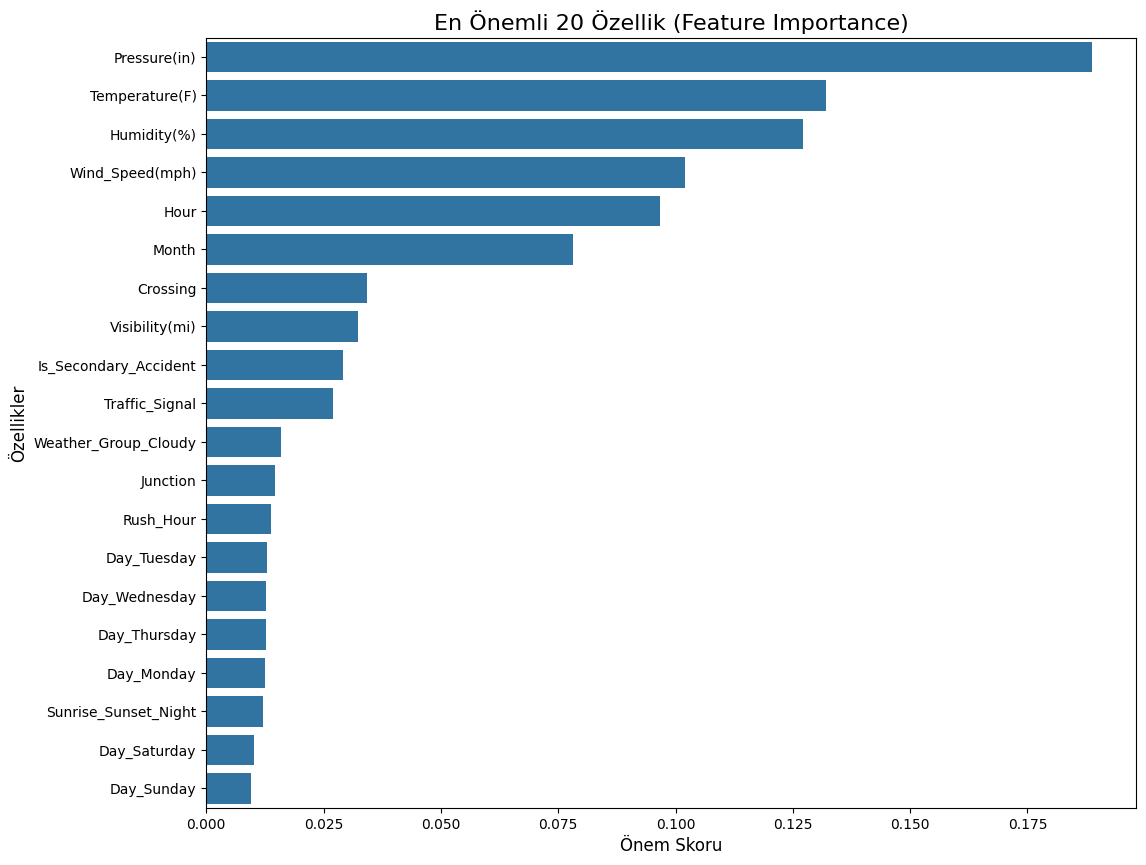

In [11]:
# --- ÖZELLİK ÖNEM DÜZEYLERİNİ GÖRSELLEŞTİRME ---
print("\n--- Model Kararlarında En Etkili Olan Özellikler ---")

feature_importances = pd.Series(rf_baseline.feature_importances_, index=X.columns)

# En önemli 20 özellik
top_20_features = feature_importances.nlargest(20)

# Görselleştirme
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_features, y=top_20_features.index)
plt.title('En Önemli 20 Özellik (Feature Importance)', fontsize=16)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.show()

d:\Datalarım\Desktop\Severity-Analysis-and-Prediction-of-Traffic-Accidents-in-Atlanta\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:46:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Model Performans Değerlendirmesi ---

1. XGBoost Modelinin Doğruluğu (Accuracy): 0.7116
2. Kesinlik (Precision): 0.7103
3. Duyarlılık (Recall): 0.7672
4. F1 Skoru: 0.7376

2. Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Ciddi Değil (0)       0.71      0.65      0.68      5994
      Ciddi (1)       0.71      0.77      0.74      6717

       accuracy                           0.71     12711
      macro avg       0.71      0.71      0.71     12711
   weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


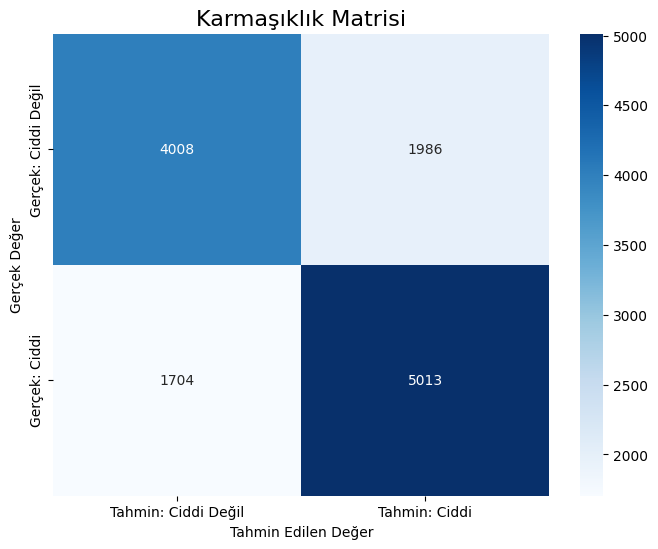

In [12]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
    
xgb_model.fit(X_train, y_train)

print("\n--- XGBoost Model Performans Değerlendirmesi ---")
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"\n1. XGBoost Modelinin Doğruluğu (Accuracy): {accuracy_xgb:.4f}")
print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred_xgb):.4f}")
print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred_xgb):.4f}")
print(f"4. F1 Skoru: {f1_score(y_test, y_pred_xgb):.4f}")

print("\n2. Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_xgb, target_names=['Ciddi Değil (0)', 'Ciddi (1)']))


print("\n3. Karmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
            yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi', fontsize=16)
plt.show()

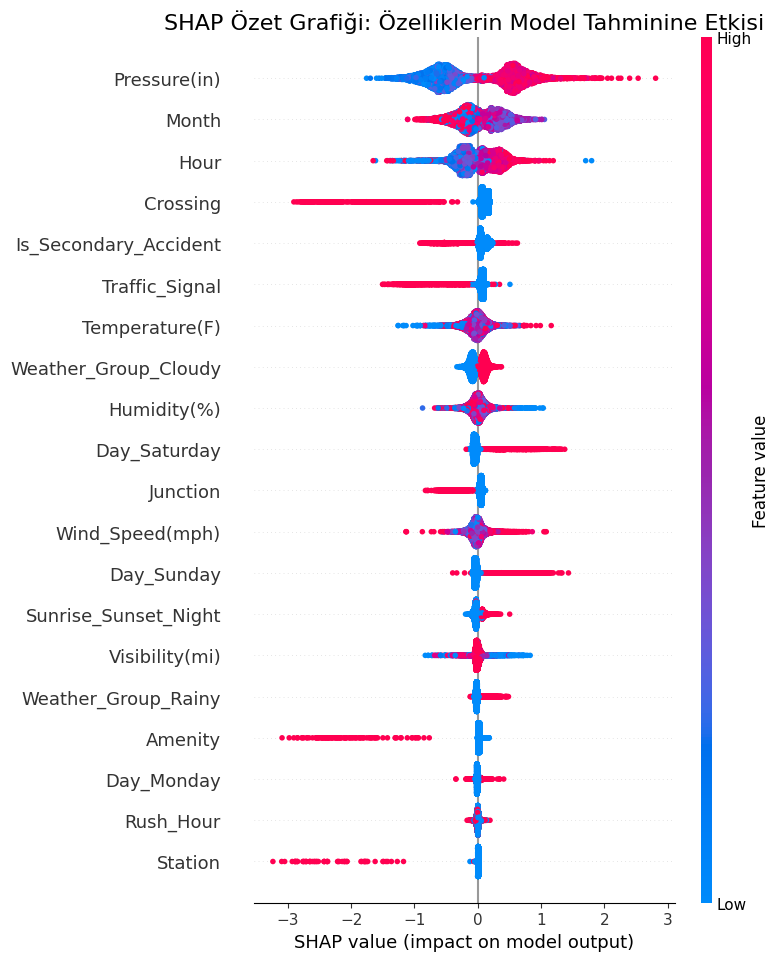

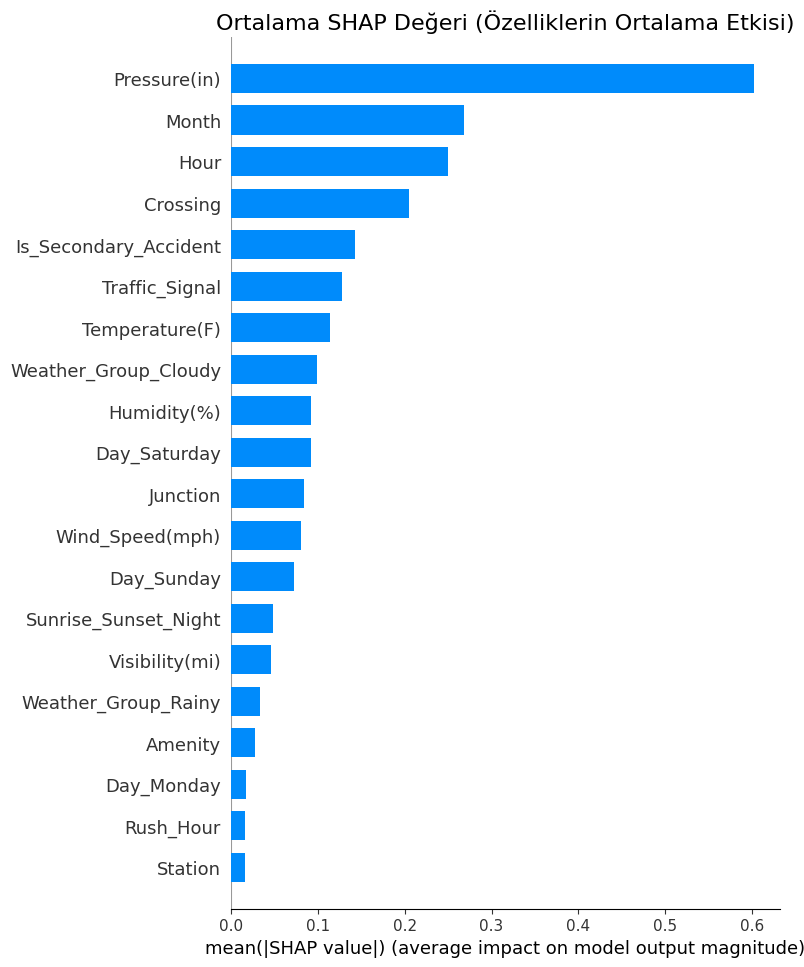

In [13]:
# --- HIZLANDIRILMIŞ SHAP ANALİZİ ---
explainer = shap.TreeExplainer(xgb_model)
X_test_sample = X_test
shap_values = explainer.shap_values(X_test_sample)


# 1. SHAP Özet Grafiği
shap.summary_plot(shap_values, X_test_sample, plot_type="dot", show=False)
plt.title("SHAP Özet Grafiği: Özelliklerin Model Tahminine Etkisi", fontsize=16)
plt.show()

# 2. Bar Grafiği - Ortalama Etki
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title("Ortalama SHAP Değeri (Özelliklerin Ortalama Etkisi)", fontsize=16)
plt.show()

# Konum Analizi

In [14]:
import pandas as pd
import hdbscan
import folium
import numpy as np


df = pd.read_csv("Atlanta_Accidents_With_Domino_Effect.csv")
df_sample = df.copy()

In [15]:
import pandas as pd
import networkx as nx
import folium

edge_file_path = 'Atlanta_Street_Network_Edges.csv'
edge_df_raw = pd.read_csv(edge_file_path)
edge_df_raw['sorted_streets'] = edge_df_raw.apply(lambda row: tuple(sorted((row['Sokak_1'], row['Sokak_2']))), axis=1)
weighted_edges = edge_df_raw['sorted_streets'].value_counts().reset_index()
weighted_edges.columns = ['streets', 'weight']
weighted_edges[['Sokak_1', 'Sokak_2']] = pd.DataFrame(weighted_edges['streets'].tolist(), index=weighted_edges.index)
G_weighted = nx.from_pandas_edgelist(weighted_edges, 'Sokak_1', 'Sokak_2', edge_attr='weight')
betweenness_centrality = nx.betweenness_centrality(G_weighted)
centrality_df = pd.DataFrame({'Betweenness': pd.Series(betweenness_centrality)})

# --- HARİTA GÖRSELLEŞTİRME KISMI ---

try:
    print("Harita oluşturuluyor...")
    atlanta_df_path = 'atlanta_cleaned_data.csv'
    df = pd.read_csv(atlanta_df_path)

    # 1. Eşik Değeri Belirle: En yüksek Aradalığa sahip %5'lik dilim
    threshold = centrality_df['Betweenness'].quantile(0.95)
    
    critical_streets_series = centrality_df[centrality_df['Betweenness'] >= threshold]
    critical_streets_list = critical_streets_series.index.tolist()
    
    print(f"Aradalık skoru {threshold:.4f} eşiğinin üzerinde olan {len(critical_streets_list)} kritik sokak bulundu:")
    print(critical_streets_list)

    # Haritayı Atlanta'nın merkezine odaklama
    map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
    critical_map = folium.Map(location=map_center, zoom_start=11, tiles="cartodbpositron")

    df_sample_bg = df.sample(n=15000, random_state=42)
    for _, row in df_sample_bg.iterrows():
        folium.CircleMarker(
            location=[row['Start_Lat'], row['Start_Lng']], radius=1, color='gray', 
            fill_opacity=0.3, fill=True, weight=0
        ).add_to(critical_map)

    critical_accidents_df = df[df['Street'].isin(critical_streets_list)]
    critical_accidents_sample = critical_accidents_df.sample(n=min(len(critical_accidents_df), 7000), random_state=42)
    
    for _, row in critical_accidents_sample.iterrows():
        folium.CircleMarker(
            location=[row['Start_Lat'], row['Start_Lng']], radius=2, color='red',
            fill_opacity=0.7, fill=True, weight=1, popup=row['Street']
        ).add_to(critical_map)

    # Haritayı kaydetme
    map_path = 'Atlanta_Critical_Streets_Map_Threshold.html'
    critical_map.save(map_path)

except Exception as e:
    print(f"Beklenmedik bir hata oluştu: {e}")

Harita oluşturuluyor...
Aradalık skoru 0.0153 eşiğinin üzerinde olan 27 kritik sokak bulundu:
['Exits 9 10A 10B I-20.', 'I-285 Southbound', 'I-20 Eastbound', 'I-20 Westbound', 'I-285 Northbound', 'I-75 Southbound', 'I-85 Southbound', 'I-75 Northbound', 'I-20.', 'I-285 Eastbound', 'I-285 Westbound', 'I-85 I-75 Southbound', 'I-85 Northbound', 'Capitol Ave.', 'I-85.', 'I-75 Hov Lane.', 'I-285.', 'GA-400 Northbound', 'Exits 32 33B I-85.', 'I-85 I-75 Northbound', '75/85 Northbound', 'Edgewood Ave NB only', 'I-75.', '17th St.', 'I-285', 'Buford Hwy.', 'GA-166 Arthur Langford Pkwy Westbound']


In [16]:
import re

junction_df = df[df['Junction'] == True].dropna(subset=['Description']).copy()

edge_list = []
pattern = re.compile(r' on (.+?)(?: at | & )(.+?)(?: - | \.|,|$)')

for index, row in junction_df.iterrows():
    match = pattern.search(row['Description'])
    if match:
        street1 = match.group(1).strip()
        street2 = match.group(2).strip()
        
        if len(street1) > 2 and len(street2) > 2 and street1 != street2:
            edge_list.append((street1, street2))

print(f"{len(edge_list)} adet kesişim (kenar) bulundu.")

edge_df = pd.DataFrame(edge_list, columns=['Sokak_1', 'Sokak_2'])


edge_df.to_csv('Atlanta_Street_Network_Edges.csv', index=False)

print("\nİlk 5 kenar örneği:")
print(edge_df.head())

1484 adet kesişim (kenar) bulundu.

İlk 5 kenar örneği:
                Sokak_1                               Sokak_2
0       I-75 Southbound  Exits 238B 239 Charles W Grant Pkwy.
1        I-20 Eastbound                 Exit 56A McDaniel St.
2  I-85 I-75 Southbound                       Exit 249D I-75.
3        I-20 Eastbound                                I-285.
4      I-285 Southbound                 Exits 9 10A 10B I-20.


In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


edge_df['sorted_streets'] = edge_df.apply(lambda row: tuple(sorted((row['Sokak_1'], row['Sokak_2']))), axis=1)

weighted_edges = edge_df['sorted_streets'].value_counts().reset_index()
weighted_edges.columns = ['streets', 'weight']

weighted_edges[['Sokak_1', 'Sokak_2']] = pd.DataFrame(weighted_edges['streets'].tolist(), index=weighted_edges.index)

print(f"\n{len(weighted_edges)} adet benzersiz kesişim için ağırlıklar hesaplandı.")
print("En çok kaza olan ilk 5 kesişim:")
print(weighted_edges.head())


G_weighted = nx.from_pandas_edgelist(weighted_edges, 'Sokak_1', 'Sokak_2', edge_attr='weight')

print(f"\nAğırlıklı Ağ oluşturuldu. Düğüm Sayısı: {G_weighted.number_of_nodes()}, Kenar Sayısı: {G_weighted.number_of_edges()}")

print("\nAğırlıklı merkeziyet metrikleri hesaplanıyor...")


degree_centrality_w = {node: val for node, val in G_weighted.degree(weight='weight')}
betweenness_centrality_w = nx.betweenness_centrality(G_weighted, weight=None) 

centrality_df_w = pd.DataFrame({
    'Weighted_Degree': pd.Series(degree_centrality_w),
    'Betweenness': pd.Series(betweenness_centrality_w)
})

print("\n--- EN RİSKLİ SOKAKLAR (Ağırlıklı Dereceye Göre) ---")
print(centrality_df_w.sort_values(by='Weighted_Degree', ascending=False).head(10))

print("\n--- EN KRİTİK KÖPRÜ SOKAKLAR (Aradalığa Göre) ---")
print(centrality_df_w.sort_values(by='Betweenness', ascending=False).head(10))




579 adet benzersiz kesişim için ağırlıklar hesaplandı.
En çok kaza olan ilk 5 kesişim:
                                     streets  weight                Sokak_1  \
0  (Exits 9 10A 10B I-20., I-285 Southbound)      95  Exits 9 10A 10B I-20.   
1     (Exits 51A 51B I-285., I-20 Eastbound)      71   Exits 51A 51B I-285.   
2   (Exit 4C Hammond Dr., GA-400 Southbound)      51    Exit 4C Hammond Dr.   
3    (Exit 56A McDaniel St., I-20 Eastbound)      46  Exit 56A McDaniel St.   
4     (Exits 51A 51B I-285., I-20 Westbound)      32   Exits 51A 51B I-285.   

             Sokak_2  
0   I-285 Southbound  
1     I-20 Eastbound  
2  GA-400 Southbound  
3     I-20 Eastbound  
4     I-20 Westbound  

Ağırlıklı Ağ oluşturuldu. Düğüm Sayısı: 523, Kenar Sayısı: 579

Ağırlıklı merkeziyet metrikleri hesaplanıyor...

--- EN RİSKLİ SOKAKLAR (Ağırlıklı Dereceye Göre) ---
                       Weighted_Degree  Betweenness
I-75 Southbound                    230     0.203725
I-20 Eastbound              

In [18]:
print(centrality_df_w["Weighted_Degree"].mean())
print(centrality_df_w["Weighted_Degree"].median())

5.674952198852773
1.0


## Graph Oluşturma

In [19]:
# --- Adım 1: Merkeziyet Skorlarını Hesapla ---
edge_file_path = 'Atlanta_Street_Network_Edges.csv'
edge_df_raw = pd.read_csv(edge_file_path)
edge_df_raw['sorted_streets'] = edge_df_raw.apply(lambda row: tuple(sorted((row['Sokak_1'], row['Sokak_2']))), axis=1)
weighted_edges = edge_df_raw['sorted_streets'].value_counts().reset_index()
weighted_edges.columns = ['streets', 'weight']
weighted_edges[['Sokak_1', 'Sokak_2']] = pd.DataFrame(weighted_edges['streets'].tolist(), index=weighted_edges.index)
G_weighted = nx.from_pandas_edgelist(weighted_edges, 'Sokak_1', 'Sokak_2', edge_attr='weight')

betweenness_centrality = nx.betweenness_centrality(G_weighted)
degree_centrality_w = {node: val for node, val in G_weighted.degree(weight='weight')}

# --- Adım 2: Yeni Skalar Özellikleri Oluşturma ---
final_file_path = 'atlanta_cleaned_data.csv'
df = pd.read_csv(final_file_path)

# 2a. Betweenness Skoru Özelliği
df['Betweenness_Score'] = df['Street'].map(betweenness_centrality).fillna(0)

# 2b. Ağırlıklı Derece Skoru Özelliği
df['Weighted_Degree_Score'] = df['Street'].map(degree_centrality_w).fillna(0)

## RandomForest


--- Model Karşılaştırmaları ---
Modelin Doğruluğu: 0.7102
2. Kesinlik (Precision): 0.7196
3. Duyarlılık (Recall): 0.7398
4. F1 Skoru: 0.7296
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.68      0.69      5994
       Ciddi       0.72      0.74      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.71      0.71     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


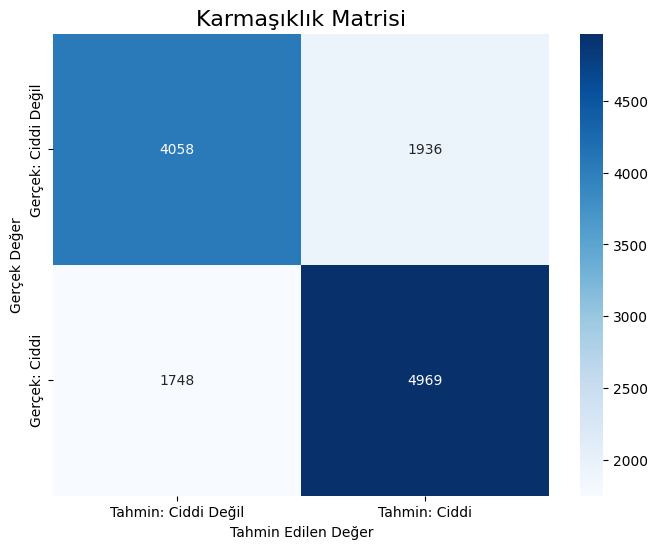

Modelin Doğruluğu: 0.7121
2. Kesinlik (Precision): 0.7223
3. Duyarlılık (Recall): 0.7393
4. F1 Skoru: 0.7307
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.68      0.69      5994
       Ciddi       0.72      0.74      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.71      0.71     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


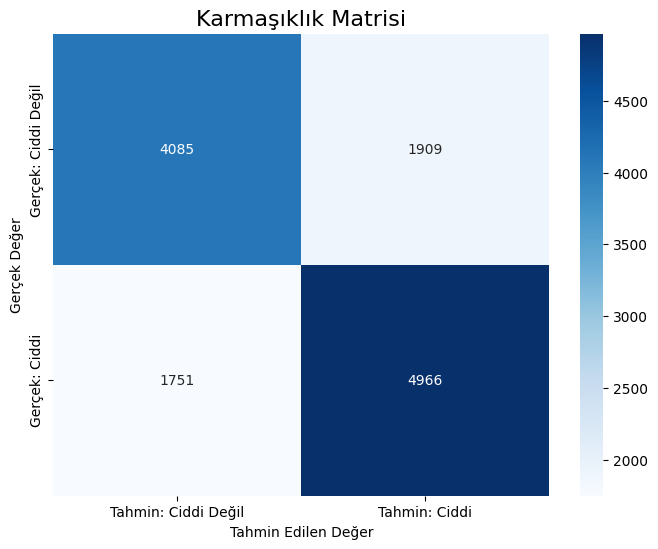

Modelin Doğruluğu: 0.7140
2. Kesinlik (Precision): 0.7231
3. Duyarlılık (Recall): 0.7435
4. F1 Skoru: 0.7332
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.68      0.69      5994
       Ciddi       0.72      0.74      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.71      0.71     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


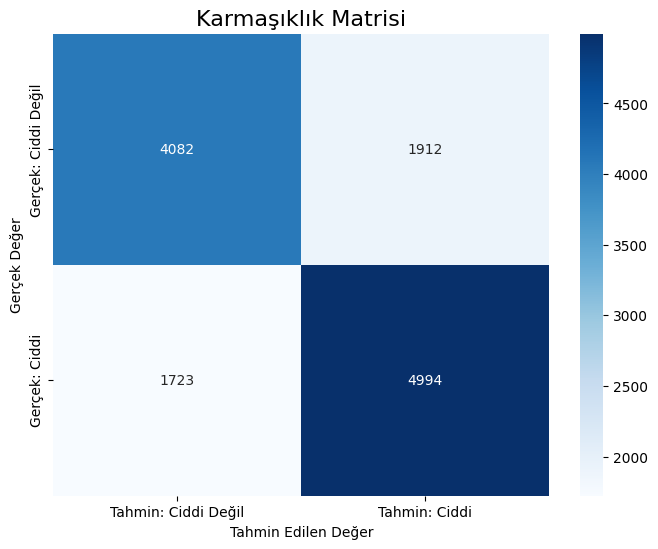


--- NİHAİ SONUÇLAR ---
Temel Modelin Başarısı:                 0.7094
Model + Betweenness Score Başarısı:     0.7102
Model + Weighted Degree Score Başarısı: 0.7121
Model + Her İki Özellik Başarısı:       0.7140


In [20]:
def train_rf_with_new_feature(dataframe, new_feature_to_use):    
    cols_to_drop = [
    'ID', 'Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
    'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Weather_Condition',
    'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
    'Wind_Direction', 'YearMonth','End_Lat', 'End_Lng', 'Distance(mi)','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
    ]

    if new_feature_to_use == 'Betweenness_Score':
        cols_to_drop.append('Weighted_Degree_Score')
    elif new_feature_to_use == 'Weighted_Degree_Score':
        cols_to_drop.append('Betweenness_Score')


    df_model = dataframe.drop(columns=[col for col in cols_to_drop if col in dataframe.columns])
    
    X = df_model.drop('Severity', axis=1, errors='ignore')
    y = dataframe['Severity']
    
    X = pd.get_dummies(X, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Modelin Doğruluğu: {accuracy:.4f}")
    print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred):.4f}")
    print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred):.4f}")
    print(f"4. F1 Skoru: {f1_score(y_test, y_pred):.4f}")
    print("Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred, target_names=['Ciddi Değil', 'Ciddi']))
    print("\n3. Karmaşıklık Matrisi:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
                yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
    plt.ylabel('Gerçek Değer')
    plt.xlabel('Tahmin Edilen Değer')
    plt.title('Karmaşıklık Matrisi', fontsize=16)
    plt.show()
    return accuracy, model,X

# --- Ana Modeli ve Yeni Özellikli Modelleri Çalıştır ---
print("\n--- Model Karşılaştırmaları ---")

# Temel model için 
df_base= df.drop(columns=['Betweenness_Score', 'Weighted_Degree_Score'])
base_accuracy = 0.7094 # Daha önce bulduğumuz skor

# Betweenness skoru ile model
betweenness_accuracy,betweenness_model,X_betweenness = train_rf_with_new_feature(df, 'Betweenness_Score')

# Weighted Degree skoru ile model
degree_accuracy,degree_model,X_degree = train_rf_with_new_feature(df, 'Weighted_Degree_Score')

# Betweenness skoru ve Weighted Degree skoru ile model
both_accuracy,both_model,X_both = train_rf_with_new_feature(df, 'Both_Scores')


print("\n--- NİHAİ SONUÇLAR ---")
print(f"Temel Modelin Başarısı:                 {base_accuracy:.4f}")

print(f"Model + Betweenness Score Başarısı:     {betweenness_accuracy:.4f}")
print(f"Model + Weighted Degree Score Başarısı: {degree_accuracy:.4f}")
print(f"Model + Her İki Özellik Başarısı:       {both_accuracy:.4f}")

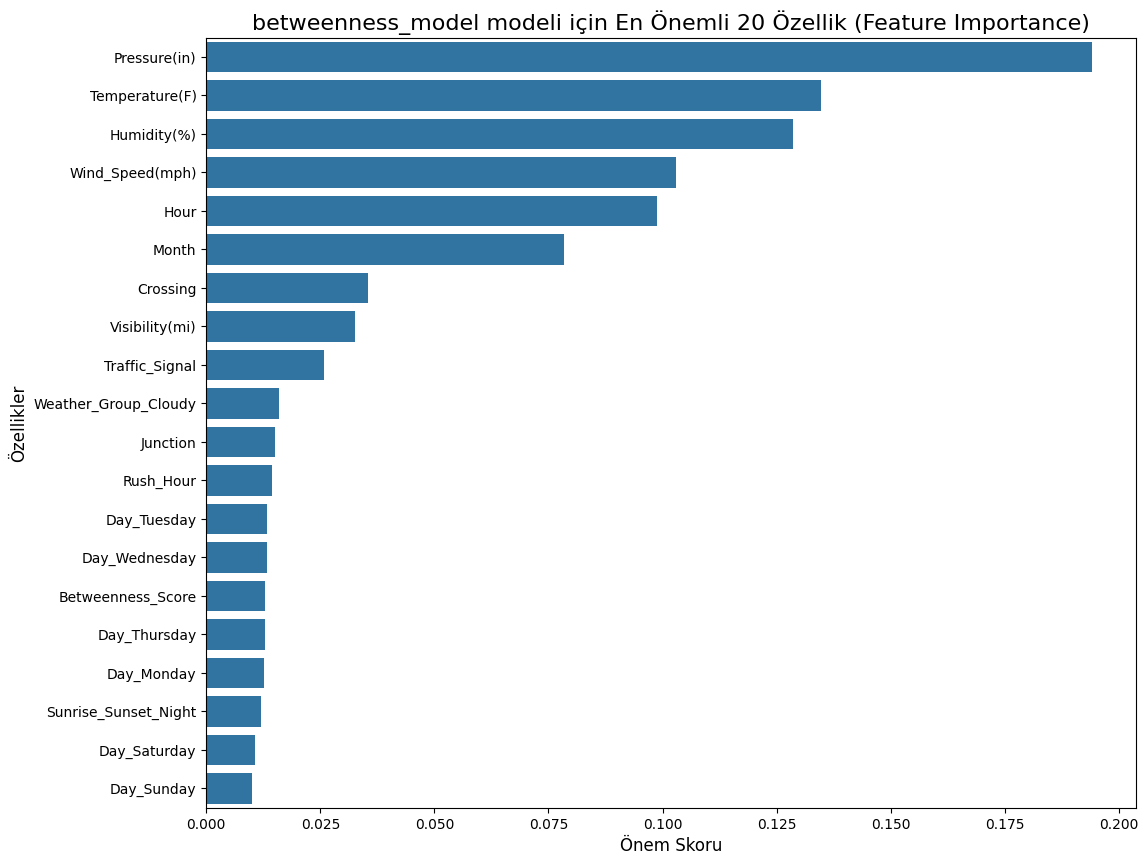

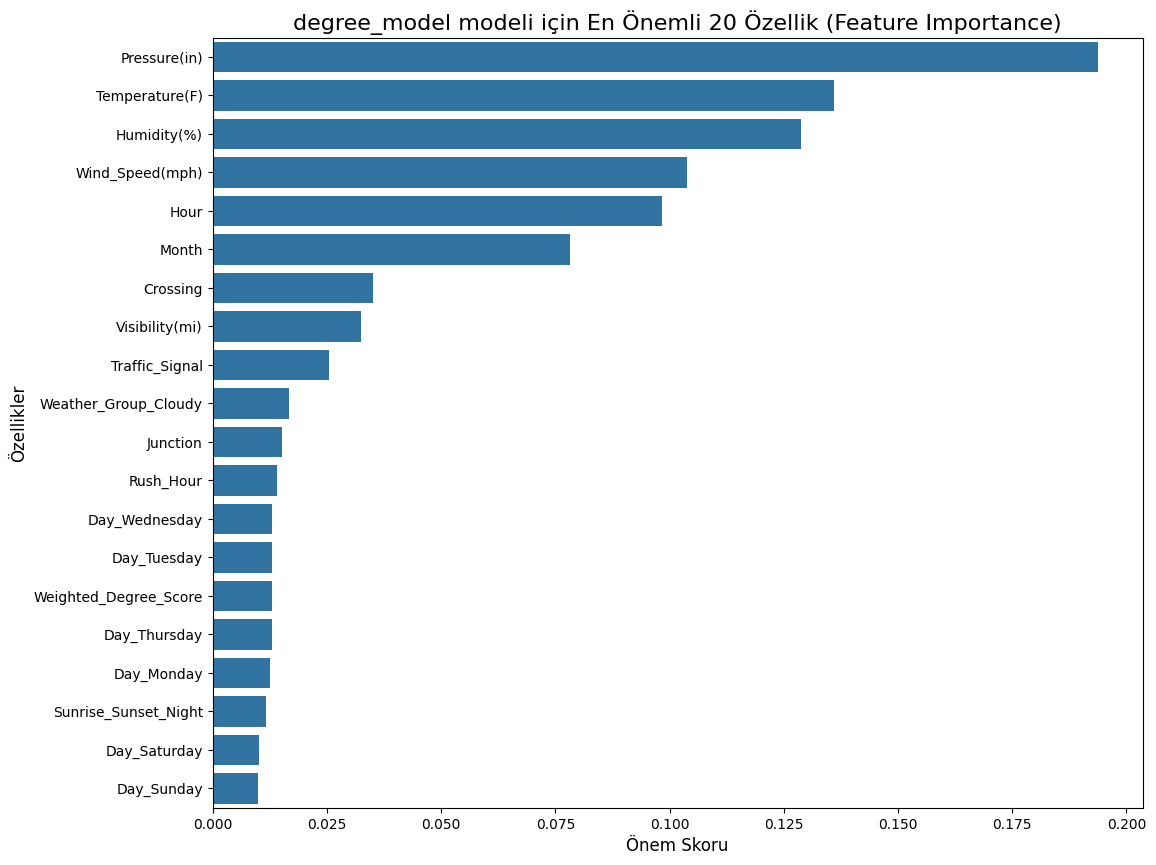

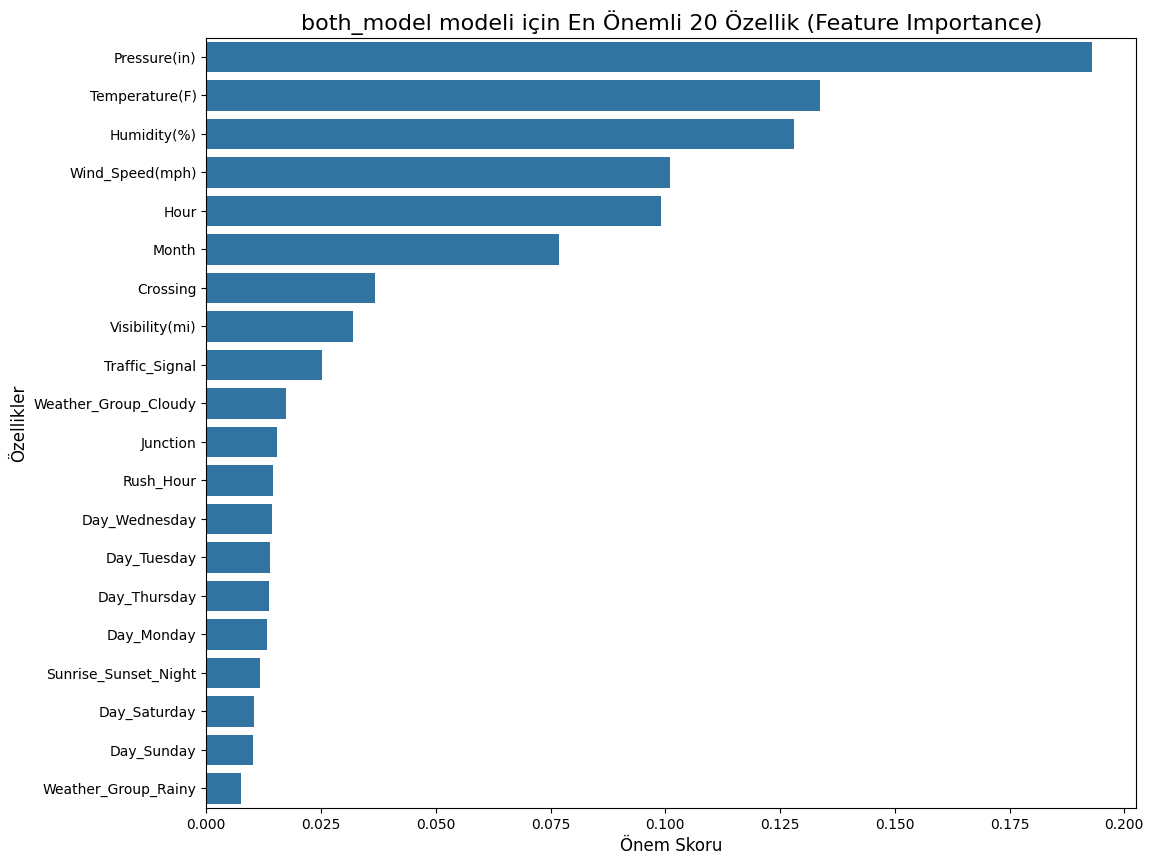

In [21]:
models = [betweenness_model, degree_model, both_model]
model_names = ["betweenness_model", "degree_model", "both_model"]
Xs = [X_betweenness, X_degree, X_both]

for i in range(len(models)):
    model = models[i]
    X = Xs[i]
    model_name = model_names[i]
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)

    # En önemli 20 özellik
    top_20_features = feature_importances.nlargest(20)

    # Görselleştirme
    plt.figure(figsize=(12, 10))
    sns.barplot(x=top_20_features, y=top_20_features.index)
    plt.title(f'{model_name} modeli için En Önemli 20 Özellik (Feature Importance)', fontsize=16)
    plt.xlabel('Önem Skoru', fontsize=12)
    plt.ylabel('Özellikler', fontsize=12)
    plt.show()

## XGBoosting


--- Model Karşılaştırmaları ---
Modelin Doğruluğu: 0.7044
2. Kesinlik (Precision): 0.7064
3. Duyarlılık (Recall): 0.7542
4. F1 Skoru: 0.7295
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.65      0.67      5994
       Ciddi       0.71      0.75      0.73      6717

    accuracy                           0.70     12711
   macro avg       0.70      0.70      0.70     12711
weighted avg       0.70      0.70      0.70     12711


3. Karmaşıklık Matrisi:


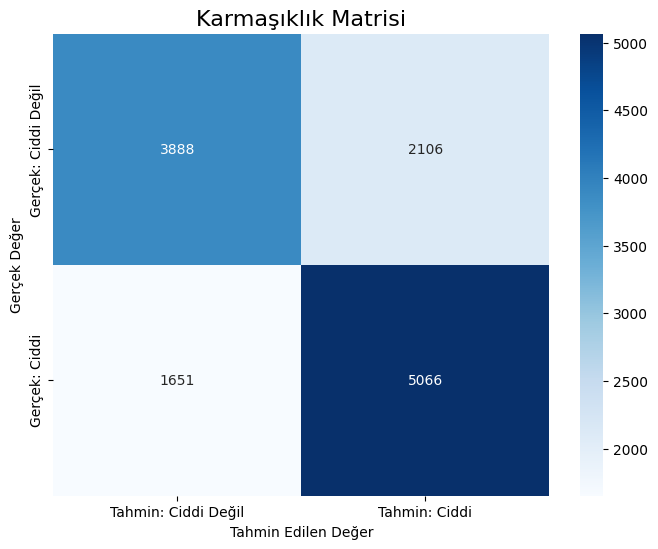

Modelin Doğruluğu: 0.7062
2. Kesinlik (Precision): 0.7094
3. Duyarlılık (Recall): 0.7523
4. F1 Skoru: 0.7302
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.65      0.68      5994
       Ciddi       0.71      0.75      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.70      0.70     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


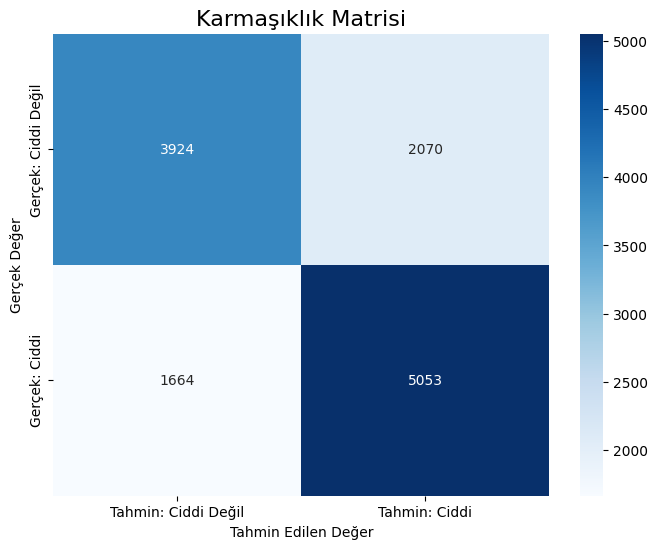

Modelin Doğruluğu: 0.7062
2. Kesinlik (Precision): 0.7094
3. Duyarlılık (Recall): 0.7520
4. F1 Skoru: 0.7301
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.65      0.68      5994
       Ciddi       0.71      0.75      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.70      0.70     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


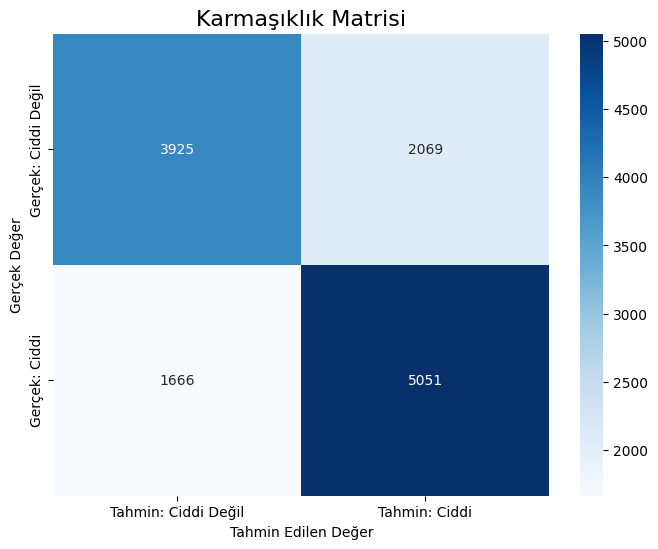


--- NİHAİ SONUÇLAR ---
Temel Modelin Başarısı:                 0.7094
Model + Betweenness Score Başarısı:     0.7044
Model + Weighted Degree Score Başarısı: 0.7062
Model + Her İki Özellik Başarısı:       0.7062


In [22]:
def train_xgb_with_new_feature(dataframe, new_feature_to_use):    
    cols_to_drop = [
    'ID', 'Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
    'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Weather_Condition',
    'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
    'Wind_Direction', 'YearMonth','End_Lat', 'End_Lng', 'Distance(mi)','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
    ]

    if new_feature_to_use == 'Betweenness_Score':
        cols_to_drop.append('Weighted_Degree_Score')
    elif new_feature_to_use == 'Weighted_Degree_Score':
        cols_to_drop.append('Betweenness_Score')


    df_model = dataframe.drop(columns=[col for col in cols_to_drop if col in dataframe.columns])
    
    X = df_model.drop('Severity', axis=1, errors='ignore')
    y = dataframe['Severity'] 
    
    X = pd.get_dummies(X, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    model = XGBClassifier(random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Modelin Doğruluğu: {accuracy:.4f}")
    print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred):.4f}")
    print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred):.4f}")
    print(f"4. F1 Skoru: {f1_score(y_test, y_pred):.4f}")
    print("Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred, target_names=['Ciddi Değil', 'Ciddi']))
    print("\n3. Karmaşıklık Matrisi:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
                yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
    plt.ylabel('Gerçek Değer')
    plt.xlabel('Tahmin Edilen Değer')
    plt.title('Karmaşıklık Matrisi', fontsize=16)
    plt.show()
    return accuracy, model,X

# --- Ana Modeli ve Yeni Özellikli Modelleri Çalıştır ---
print("\n--- Model Karşılaştırmaları ---")

# Temel model için
df_base= df.drop(columns=['Betweenness_Score', 'Weighted_Degree_Score'])
base_accuracy = 0.7094 # Daha önce bulduğumuz skor

# Betweenness skoru ile model
betweenness_accuracy,betweenness_model,X_betweenness = train_xgb_with_new_feature(df, 'Betweenness_Score')

# Weighted Degree skoru ile model
degree_accuracy,degree_model,X_degree = train_xgb_with_new_feature(df, 'Weighted_Degree_Score')

# Betweenness skoru ve Weighted Degree skoru ile model
both_accuracy,both_model,X_both = train_xgb_with_new_feature(df, 'Both_Scores')


print("\n--- NİHAİ SONUÇLAR ---")
print(f"Temel Modelin Başarısı:                 {base_accuracy:.4f}")

print(f"Model + Betweenness Score Başarısı:     {betweenness_accuracy:.4f}")
print(f"Model + Weighted Degree Score Başarısı: {degree_accuracy:.4f}")
print(f"Model + Her İki Özellik Başarısı:       {both_accuracy:.4f}")

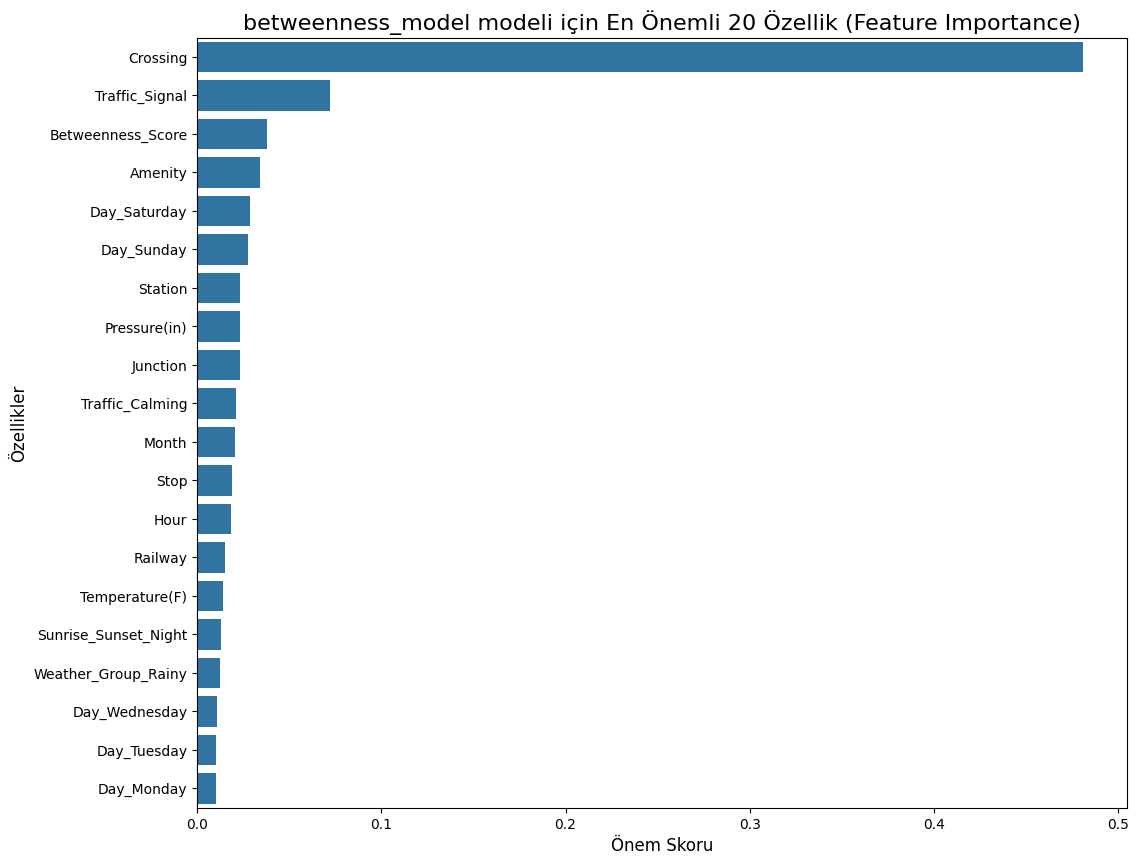

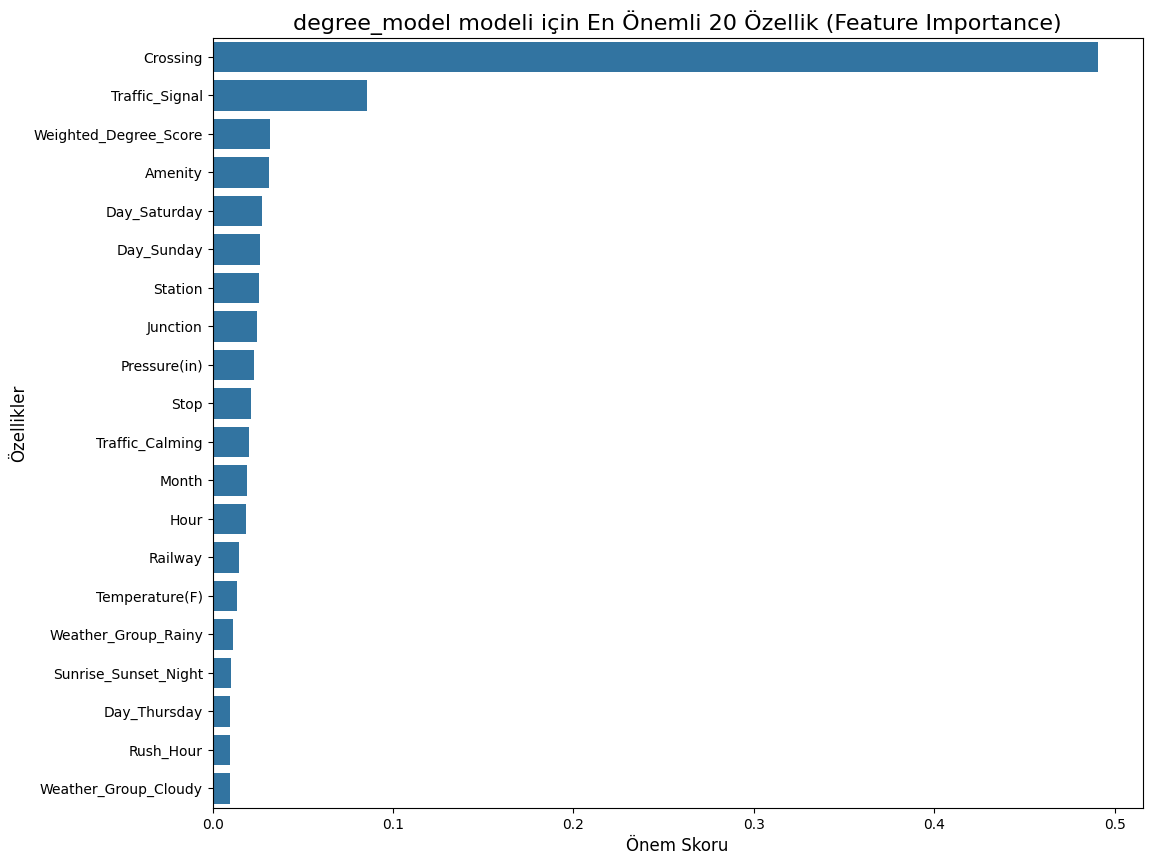

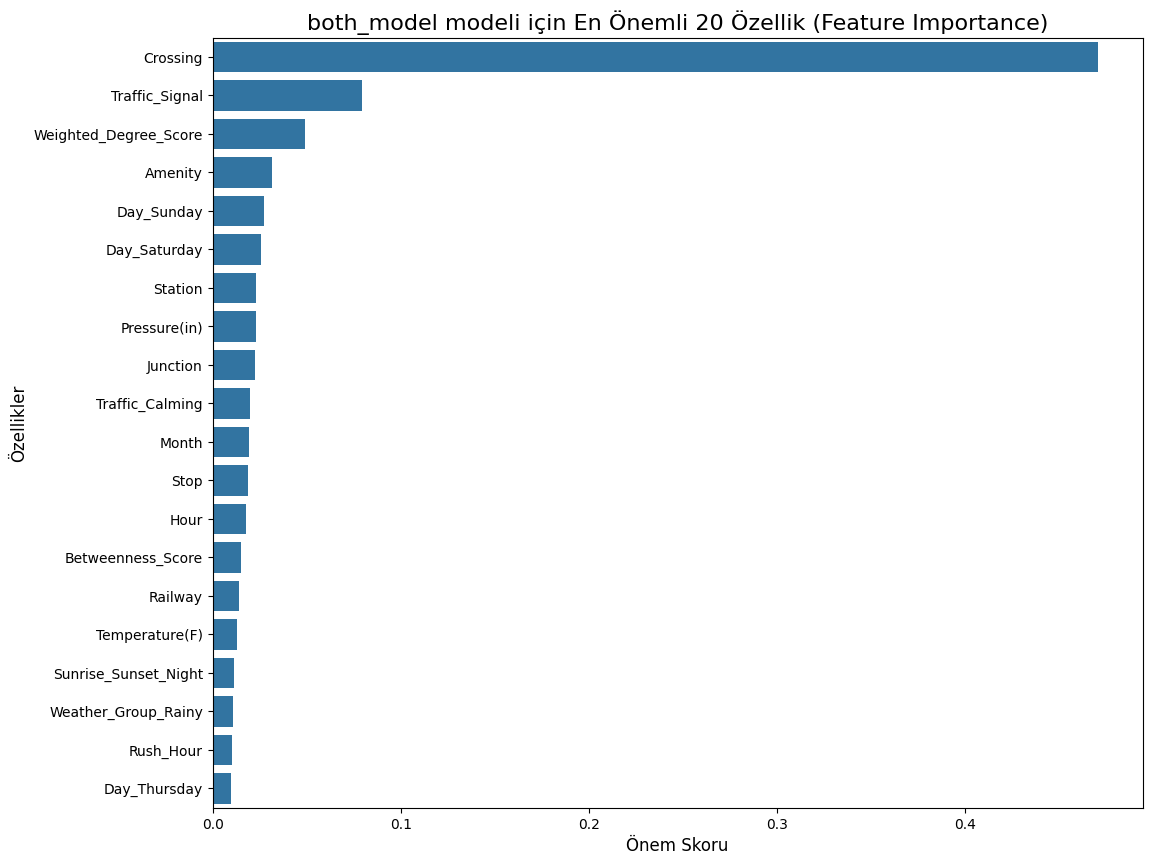

In [23]:
models = [betweenness_model, degree_model, both_model]
model_names = ["betweenness_model", "degree_model", "both_model"]
Xs = [X_betweenness, X_degree, X_both]

for i in range(len(models)):
    model = models[i]
    X = Xs[i]
    model_name = model_names[i]
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)

    # En önemli 20 özellik
    top_20_features = feature_importances.nlargest(20)

    # Görselleştirme
    plt.figure(figsize=(12, 10))
    sns.barplot(x=top_20_features, y=top_20_features.index)
    plt.title(f'{model_name} modeli için En Önemli 20 Özellik (Feature Importance)', fontsize=16)
    plt.xlabel('Önem Skoru', fontsize=12)
    plt.ylabel('Özellikler', fontsize=12)
    plt.show()